## Part II: Bayesian Bandit Algorithms
There are two arms which may be pulled repeatedly in any order.
Each pull may result in either a success or a failure.
The sequence of successes and failures which results from pulling arm $i$ ($i \in \{1, 2\}$) forms a Bernoulli process with unknown success probability $\theta_{i}$.
A success at the $t^{th}$ pull yields a reward $\gamma^{t-1}$ ($0 < \gamma <1$), while an unsuccessful pull yields a zero reward.
At time zero, each $\theta_{i}$ has a Beta prior distribution with two parameters $\alpha_{i}, \beta_{i}$ and these distributions are independent for different arms.
These prior distributions are updated to posterior distributions as arms are pulled.
Since the class of Beta distributions is closed under Bernoulli sampling, posterior distributions are all Beta distributions.
How should the arm to pull next in each time slot be chosen to maximize the total expected reward from an infinite sequence of pulls?

#### 1. 	One intuitive policy suggests that in each time slot we should pull the arm for which the current expected value of $\theta_{i}$ is the largest. This policy behaves very good in most cases. Please design simulations to check the behavior of this policy.

In [8]:
import numpy as np
from tqdm import tqdm

def intuitive_policy(N, gamma, true_theta, alpha, beta):
    """
    Implements the intuitive policy for a two-armed bandit problem with discounted rewards.
    
    Args:
        N (int): Number of time steps
        gamma (float): Discount factor
        true_theta (np.ndarray): True probabilities for each arm
        alpha (list): Initial alpha parameters for Beta distribution
        beta (list): Initial beta parameters for Beta distribution
    
    Returns:
        float: Sum of discounted rewards
    """
    rewards = np.zeros(N)
    alpha = np.array(alpha)  
    beta = np.array(beta)

    for t in range(N):
        theta_estimate = alpha / (alpha + beta)
        chosen_arm = np.argmax(theta_estimate)

        reward = np.random.rand() < true_theta[chosen_arm]
        rewards[t] = reward * (gamma ** t)
        
        alpha[chosen_arm] += reward
        beta[chosen_arm] += 1 - reward

    return np.sum(rewards)

num_trials = 200
N = 5000
gamma_list = [0.1, 0.3, 0.5, 0.7, 0.9, 0.99]
alpha_list = [[1, 1], [2, 1], [20, 1]]
beta_list = [[1, 1], [1, 1], [10, 1]]

for gamma in gamma_list:
    for alpha, beta in zip(alpha_list, beta_list):
        rewards = np.zeros(num_trials)
        regret_rate = np.zeros(num_trials)
        
        for i in tqdm(range(num_trials)):
            true_theta = np.random.rand(2)

            rewards[i] = intuitive_policy(N, gamma, true_theta, alpha, beta)
            max_value = np.max(true_theta) / (1 - gamma)
            regret_rate[i] = 1 - rewards[i] / max_value
            
        print(f"gamma: {gamma}, alpha: {alpha}, beta: {beta}, "
              f"avg_reward: {np.mean(rewards):.4f}, "
              f"avg_regret_rate: {np.mean(regret_rate):.4f}")

100%|██████████| 200/200 [00:03<00:00, 51.54it/s]


gamma: 0.1, alpha: [1, 1], beta: [1, 1], avg_reward: 0.5534, avg_regret_rate: 0.2794


100%|██████████| 200/200 [00:03<00:00, 51.16it/s]


gamma: 0.1, alpha: [2, 1], beta: [1, 1], avg_reward: 0.5405, avg_regret_rate: 0.2721


100%|██████████| 200/200 [00:03<00:00, 51.99it/s]


gamma: 0.1, alpha: [20, 1], beta: [10, 1], avg_reward: 0.5649, avg_regret_rate: 0.2339


100%|██████████| 200/200 [00:03<00:00, 53.22it/s]


gamma: 0.3, alpha: [1, 1], beta: [1, 1], avg_reward: 0.7975, avg_regret_rate: 0.1243


100%|██████████| 200/200 [00:04<00:00, 48.74it/s]


gamma: 0.3, alpha: [2, 1], beta: [1, 1], avg_reward: 0.7813, avg_regret_rate: 0.2369


100%|██████████| 200/200 [00:03<00:00, 50.42it/s]


gamma: 0.3, alpha: [20, 1], beta: [10, 1], avg_reward: 0.6766, avg_regret_rate: 0.2897


100%|██████████| 200/200 [00:03<00:00, 51.15it/s]


gamma: 0.5, alpha: [1, 1], beta: [1, 1], avg_reward: 1.0809, avg_regret_rate: 0.1999


100%|██████████| 200/200 [00:03<00:00, 50.66it/s]


gamma: 0.5, alpha: [2, 1], beta: [1, 1], avg_reward: 1.0306, avg_regret_rate: 0.2144


100%|██████████| 200/200 [00:03<00:00, 52.67it/s]


gamma: 0.5, alpha: [20, 1], beta: [10, 1], avg_reward: 0.9873, avg_regret_rate: 0.2047


100%|██████████| 200/200 [00:03<00:00, 52.06it/s]


gamma: 0.7, alpha: [1, 1], beta: [1, 1], avg_reward: 2.0485, avg_regret_rate: 0.1281


100%|██████████| 200/200 [00:03<00:00, 52.50it/s]


gamma: 0.7, alpha: [2, 1], beta: [1, 1], avg_reward: 1.8086, avg_regret_rate: 0.2016


100%|██████████| 200/200 [00:03<00:00, 50.82it/s]


gamma: 0.7, alpha: [20, 1], beta: [10, 1], avg_reward: 1.6074, avg_regret_rate: 0.2460


100%|██████████| 200/200 [00:03<00:00, 53.62it/s]


gamma: 0.9, alpha: [1, 1], beta: [1, 1], avg_reward: 6.2194, avg_regret_rate: 0.0916


100%|██████████| 200/200 [00:03<00:00, 52.34it/s]


gamma: 0.9, alpha: [2, 1], beta: [1, 1], avg_reward: 6.0296, avg_regret_rate: 0.0888


100%|██████████| 200/200 [00:03<00:00, 52.35it/s]


gamma: 0.9, alpha: [20, 1], beta: [10, 1], avg_reward: 5.4094, avg_regret_rate: 0.2213


100%|██████████| 200/200 [00:03<00:00, 51.78it/s]


gamma: 0.99, alpha: [1, 1], beta: [1, 1], avg_reward: 61.6180, avg_regret_rate: 0.0568


100%|██████████| 200/200 [00:03<00:00, 53.32it/s]


gamma: 0.99, alpha: [2, 1], beta: [1, 1], avg_reward: 64.7995, avg_regret_rate: 0.0434


100%|██████████| 200/200 [00:03<00:00, 53.15it/s]

gamma: 0.99, alpha: [20, 1], beta: [10, 1], avg_reward: 61.9752, avg_regret_rate: 0.1035


To evaluate the performance of the algorithm, we need to find a suitable metric. Regret seems to be a good choice, but it is not normalized, leading to different scales for different settings. (For example, larger $\gamma$ leads to larger regret.) Thus, we use the regret rate, which shows the portion of regret to the maximum expected reward.   
The regret rate is defined as follow:  

$\text{regret rate} = 1 - \frac{Reward}{\max_i \theta_i/(1-\gamma)}$

where the maximum possible reward is achieved by always pulling the arm with the highest true probability. For the discounted setting, this equals $\frac{\max_i \theta_i}{1-\gamma}$.

The simulation results show that the intuitive policy performs well in most cases, achieving low regret rates.  
| γ | Prior (α, β) | Average Reward | Average Regret Rate |
|---|-------------|----------------|-------------------|
| 0.1 | [1,1], [1,1] | 0.5534 | 0.2794 |
| 0.1 | [2,1], [1,1] | 0.5405 | 0.2721 |
| 0.1 | [20,1], [10,1] | 0.5649 | 0.2339 |
| 0.3 | [1,1], [1,1] | 0.7975 | 0.1243 |
| 0.3 | [2,1], [1,1] | 0.7813 | 0.2369 |
| 0.3 | [20,1], [10,1] | 0.6766 | 0.2897 |
| 0.5 | [1,1], [1,1] | 1.0809 | 0.1999 |
| 0.5 | [2,1], [1,1] | 1.0306 | 0.2144 |
| 0.5 | [20,1], [10,1] | 0.9873 | 0.2047 |
| 0.7 | [1,1], [1,1] | 2.0485 | 0.1281 |
| 0.7 | [2,1], [1,1] | 1.8086 | 0.2016 |
| 0.7 | [20,1], [10,1] | 1.6074 | 0.2460 |
| 0.9 | [1,1], [1,1] | 6.2194 | 0.0916 |
| 0.9 | [2,1], [1,1] | 6.0296 | 0.0888 |
| 0.9 | [20,1], [10,1] | 5.4094 | 0.2213 |
| 0.99 | [1,1], [1,1] | 61.6180 | 0.0568 |
| 0.99 | [2,1], [1,1] | 64.7995 | 0.0434 |
| 0.99 | [20,1], [10,1] | 61.9752 | 0.1035 |

This can be attributed to several factors:

1. **Efficient Exploration**: The policy naturally balances exploration and exploitation through Bayesian updating of the Beta distributions.

2. **Prior Knowledge Integration**: The Beta distribution parameters (α, β) allow incorporating prior knowledge about the arms, which helps guide initial exploration.

3. **Quick Convergence**: As more rewards are observed, the posterior distributions quickly concentrate around the true probabilities, leading to optimal arm selection.

Looking at the simulation results across different discount factors (γ) and prior parameters (α, β), we see consistently low regret rates, indicating the policy's robustness to different parameter settings. However, as we'll see in the counter-example, there are specific scenarios where this policy can be suboptimal.


### 2. However, such intuitive policy is unfortunately not optimal. Please provide an example to show why such policy is not optimal. 

In [9]:
# Here's a counter-example with a strongly biased prior, but the second arm is actually better.
# We'll run fewer steps (N_short=100), so the policy doesn't have time to correct the prior bias.

test_runs = 1000
test_rewards = np.zeros(test_runs)
N_short = 100
gamma_close_to_1 = 0.99


counter_alpha = [200, 1]
counter_beta = [1, 1]
counter_true_theta = np.array([0.6, 0.8])  # second arm has higher probability

for i in range(test_runs):
    local_alpha = counter_alpha.copy()
    local_beta = counter_beta.copy()
    test_rewards[i] = intuitive_policy(N_short, gamma_close_to_1, counter_true_theta, local_alpha, local_beta)

avg_r = np.mean(test_rewards)
optimal_r = np.max(counter_true_theta) / (1 - gamma_close_to_1)
print(f"Average reward: {avg_r:.2f}")
print(f"Maximum possible reward: {optimal_r:.2f}")
print(f"Regret rate: {1 - avg_r/optimal_r:.2f}")

Average reward: 38.13
Maximum possible reward: 80.00
Regret rate: 0.52


Given two arms with prior distributions:  
#### Arm1  Beta(200,1), suggesting an expected value close to 1.0
#### Arm2  Beta(1,1), suggesting an expected value close to 0.5

A greedy strategy that consistently favors the arm with the higher expected value may lead to repeatedly selecting Arm 1. However, this approach has critical flaws. The prior for Arm 2 suggests significant uncertainty, as the Beta(1, 1) distribution is essentially non-informative, assigning equal probability to all values between 0 and 1.

By selecting Arm 2 more frequently, we can reduce this uncertainty and potentially uncover a true value for Arm 2 that exceeds that of Arm 1.

Focusing exclusively on Arm 1 due to its higher initial expected value neglects the possibility that Arm 2 could ultimately provide greater rewards once more data is collected. Failing to explore Arm 2 adequately risks missing out on higher returns that could arise if its true value is found to be higher than initially estimated.

When priors differ significantly in terms of uncertainty, a strategy that relies solely on expected values can lead to consistently selecting a suboptimal arm. It is crucial to strike a balance between exploiting known information and exploring uncertain but potentially more rewarding alternatives.

#### 3. For the expected total reward under an optimal policy, show that the following recurrence equation holds:

\begin{equation*}
		\begin{aligned}
			R_{1}(\alpha_{1},\beta_{1}) 
			= & \frac{\alpha_{1}}{\alpha_{1}+\beta_{1}} [1+\gamma R(\alpha_{1} + 1, \beta_{1}, \alpha_{2}, \beta_{2})] \\
				& + \frac{\beta_{1}}{\alpha_{1} + \beta_{1}} [\gamma R(\alpha_{1}, \beta_{1} + 1, \alpha_{2}, \beta_{2})]; \\
			R_{2}(\alpha_{2}, \beta_{2}) 
			= & \frac{\alpha_{2}}{\alpha_{2} + \beta_{2}} [1 + \gamma R(\alpha_{1}, \beta_{1}, \alpha_{2} + 1, \beta_{2})] \\
				& + \frac{\beta_{2}}{\alpha_{2} + \beta_{2}} [\gamma R(\alpha_{1}, \beta_{1}, \alpha_{2}, \beta_{2} + 1)]; \\
			R(\alpha_{1}, \beta_{1}, \alpha_{2}, \beta_{2}) 
			= & \max \left\{ R_{1}(\alpha_{1}, \beta_{1}), R_{2}(\alpha_{2}, \beta_{2}) \right\}.
		\end{aligned}  	
	\end{equation*}

### We first consider the case of pulling arm 1

When pulling arm 1:
- Success occurs with probability $\frac{\alpha_1}{\alpha_1+\beta_1}$ (mean of Beta distribution)
    - Immediate reward: 1

Since its Bayesian Inferece, with Beta-Binoimal conjugate, so the posterior distribution of $\theta_1$ is still a Beta distribution, The future expected reward, considering a success, updates the parameters to $Beta(\alpha_1+1,\beta_1)$ and $Beta(\alpha_1,\beta_1 + 1)$ considering failure.

So the next steps' rewards is $R(\alpha_1+1,\beta_1,\alpha_2,\beta_2)$ when success at this time, and $R(\alpha_1,\beta_1+1,\alpha_2,\beta_2)$ when failure at this time.

Since at the $t^{th}$ pull yields a reward $\gamma^{t-1}$ ($0 < \gamma <1$), which means that the future's reward is will recieve a discount $\gamma$ for each time.

#### Considering a sucess at this time
So for this time, if it sucess, we can recieve the reward $1$. And the parameters become $(\alpha_1+1,\beta_1,\alpha_2,\beta_2)$ due to the Beta-Binoimal conjugate. After the discount, the future's reward is $\gamma R(\alpha_1+1,\beta_1,\alpha_2,\beta_2)$.

Also, since success happens with probability $\theta_1$. So the total rewards when success at this time is $$\theta_1[1+\gamma R(\alpha_1+1,\beta_1,\alpha_2,\beta_2)]$$

#### Considering a failure at this time
For this time, if it fail, we can recieve the reward $0$. And the parameters become $(\alpha_1,\beta_1+1,\alpha_2,\beta_2)$ due to the Beta-Binoimal conjugate. After the discount, the future's reward is $0+\gamma R(\alpha_1,\beta_1+1,\alpha_2,\beta_2)$.

Also, since failure happens with probability $1-\theta_1$. So the total rewards when success at this time is $$(1-\theta_1)[0+\gamma R(\alpha_1,\beta_1+1,\alpha_2,\beta_2)]=(1-\theta_1)[\gamma R(\alpha_1,\beta_1+1,\alpha_2,\beta_2)]$$

So combine the two parts, we can get that the total rewards when pull the first arm is that 
$$R_1(\alpha_1,\beta_1)=\theta_1[1+\gamma R(\alpha_1+1,\beta_1,\alpha_2,\beta_2)]+(1-\theta_1)[\gamma R(\alpha_1,\beta_1+1,\alpha_2,\beta_2)]$$

$$R_1(\alpha_1,\beta_1)=\dfrac{\alpha_1}{\alpha_1+\beta_1}[1+\gamma R(\alpha_1+1,\beta_1,\alpha_2,\beta_2)]+\dfrac{\beta_1}{\alpha_1+\beta_1}[\gamma R(\alpha_1,\beta_1+1,\alpha_2,\beta_2)]$$

### Similar Reasoning for Arm 2:
The expected reward for pulling arm 2 follows the same logic, adjusting for the parameters of arm 2:

Similarly, since $$\theta_2\sim Beta(\alpha_2,\beta_2)$$
So with the same method above, we can get that:
$$R_2(\alpha_2,\beta_2)=\dfrac{\alpha_2}{\alpha_2+\beta_2}[1+\gamma R(\alpha_1,\beta_1,\alpha_2+1,\beta_2)]+\dfrac{\beta_2}{\alpha_2+\beta_2}[\gamma R(\alpha_2,\beta_1,\alpha_2,\beta_2+1)]$$

And since we want to maximize the total reward, so we can get that:
$$R(\alpha_1,\beta_1,\alpha_2,\beta_2)=\max\{R_1(\alpha_1,\beta_1),R_2(\alpha_2,\beta_2)\}$$

So above all, the following recurrence equation holds have been proven.
$$R_1(\alpha_1,\beta_1)=\dfrac{\alpha_1}{\alpha_1+\beta_1}[1+\gamma R(\alpha_1+1,\beta_1,\alpha_2,\beta_2)]+\dfrac{\beta_1}{\alpha_1+\beta_1}[\gamma R(\alpha_1,\beta_1+1,\alpha_2,\beta_2)]$$
$$R_2(\alpha_2,\beta_2)=\dfrac{\alpha_2}{\alpha_2+\beta_2}[1+\gamma R(\alpha_1,\beta_1,\alpha_2+1,\beta_2)]+\dfrac{\beta_2}{\alpha_2+\beta_2}[\gamma R(\alpha_2,\beta_1,\alpha_2,\beta_2+1)]$$
$$R(\alpha_1,\beta_1,\alpha_2,\beta_2)=\max\{R_1(\alpha_1,\beta_1),R_2(\alpha_2,\beta_2)\}$$

#### 4 For the above equations, our solution:

To solve the recursive equations, we use an approximate method since solving them exactly is impractical due to the infinite number of states and the absence of clear boundaries. In our approach, we introduce a counter to track the number of times each arm has been pulled. Once the counter exceeds 100 pulls, we assume that the exploration phase has provided sufficient information about the arms. At this point, we transition to the exploitation phase, where we choose the arm with the higher mean value. The mean for each arm is computed as $ \frac{\alpha}{\alpha + \beta} $, based on its Beta distribution parameters.

To enhance efficiency, we implement a small optimization by using a dictionary to store the results of states that have already been calculated. This prevents redundant computations and accelerates the process significantly, as many states are encountered repeatedly. This optimization is conceptually similar to memoization in dynamic programming, where previously computed results are reused to avoid recalculating them. By adopting this approach, we strike a balance between exploration and exploitation, while also improving the computational efficiency of our algorithm.

In [10]:
results_cache = {}
policy = {}

def calculate_R(alpha1, beta1, alpha2, beta2, discount_factor, exploration_count, max_exploration = 100):
    if (alpha1, beta1, alpha2, beta2) in results_cache:
        return results_cache[(alpha1, beta1, alpha2, beta2)]

    if exploration_count > max_exploration:
        mean_arm1 = alpha1 / (alpha1 + beta1)
        mean_arm2 = alpha2 / (alpha2 + beta2)
        results_cache[(alpha1, beta1, alpha2, beta2)] = max(mean_arm1, mean_arm2)
        policy[(alpha1, beta1, alpha2, beta2)] = mean_arm1 > mean_arm2
        return max(mean_arm1, mean_arm2) 

    expected_reward_arm1 = (
        (alpha1 / (alpha1 + beta1)) * (1 + discount_factor * calculate_R(alpha1 + 1, beta1, alpha2, beta2, discount_factor, exploration_count + 1))
        + (beta1 / (alpha1 + beta1)) * (discount_factor * calculate_R(alpha1, beta1 + 1, alpha2, beta2, discount_factor, exploration_count + 1))
    )

    expected_reward_arm2 = (
        (alpha2 / (alpha2 + beta2)) * (1 + discount_factor * calculate_R(alpha1, beta1, alpha2 + 1, beta2, discount_factor, exploration_count + 1))
        + (beta2 / (alpha2 + beta2)) * (discount_factor * calculate_R(alpha1, beta1, alpha2, beta2 + 1, discount_factor, exploration_count + 1))
    )

    max_reward = max(expected_reward_arm1, expected_reward_arm2)

    results_cache[(alpha1, beta1, alpha2, beta2)] = max_reward
    policy[(alpha1, beta1, alpha2, beta2)] = expected_reward_arm1 > expected_reward_arm2

    return max_reward

The code above contains our implementation.

Another possible solution is by using Q-Learning. As we can regard $R_1$ and $R_2$ as the Q-value of the state, and $R$ as the value of the state, the problem is actually a Markov Decision Process (MDP) problem. We can use Q-learning or other reinforcement learning algorithms to
solve it.

In [11]:
import numpy as np

class BayesianBanditQLearning:
    def __init__(self, alpha1, beta1, alpha2, beta2, gamma, learning_rate=0.1, epsilon=0.1):
        self.alpha1 = alpha1
        self.beta1 = beta1
        self.alpha2 = alpha2
        self.beta2 = beta2
        self.gamma = gamma
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.q_values = {}
        
    def get_state_key(self, alpha1, beta1, alpha2, beta2):
        return (alpha1, beta1, alpha2, beta2)
    
    def get_q_value(self, state, action):
        if state not in self.q_values:
            self.q_values[state] = np.zeros(2)
        return self.q_values[state][action]
    
    def choose_action(self, state):
        if np.random.random() < self.epsilon:
            return np.random.randint(2)
        else:
            return np.argmax(self.q_values.get(state, np.zeros(2)))
    
    def update(self, state, action, reward, next_state):
        current_q = self.get_q_value(state, action)
        next_max_q = np.max(self.q_values.get(next_state, np.zeros(2)))
        
        # Q-learning update rule
        new_q = current_q + self.learning_rate * (reward + self.gamma * next_max_q - current_q)
        
        if state not in self.q_values:
            self.q_values[state] = np.zeros(2)
        self.q_values[state][action] = new_q

    def train(self, episodes=1000, max_steps=100):
        for _ in range(episodes):
            # Reset state for new episode
            alpha1, beta1 = self.alpha1, self.beta1
            alpha2, beta2 = self.alpha2, self.beta2
            
            for step in range(max_steps):
                state = self.get_state_key(alpha1, beta1, alpha2, beta2)
                action = self.choose_action(state)
                
                # Generate reward based on Beta distribution
                if action == 0:
                    success_prob = alpha1 / (alpha1 + beta1)
                    reward = 1 if np.random.random() < success_prob else 0
                    if reward:
                        alpha1 += 1
                    else:
                        beta1 += 1
                else:
                    success_prob = alpha2 / (alpha2 + beta2)
                    reward = 1 if np.random.random() < success_prob else 0
                    if reward:
                        alpha2 += 1
                    else:
                        beta2 += 1
                
                reward = reward * (self.gamma ** step)
                next_state = self.get_state_key(alpha1, beta1, alpha2, beta2)
                
                self.update(state, action, reward, next_state)

# Test the Q-learning implementation
ql = BayesianBanditQLearning(alpha1=1, beta1=1, alpha2=1, beta2=1, gamma=0.9)
ql.train()

# Get optimal policy for initial state
initial_state = ql.get_state_key(1, 1, 1, 1)
optimal_action = np.argmax(ql.q_values.get(initial_state, np.zeros(2)))
print(f"Optimal action for initial state: Arm {optimal_action + 1}")
print(f"Q-values for initial state: {ql.q_values.get(initial_state, np.zeros(2))}")

Optimal action for initial state: Arm 1
Q-values for initial state: [2.29027634 1.20295999]


#### 5 The optimal policy:

In [12]:
def optimal_policy(N, gamma, true_theta, alpha, beta, max_exploration = 100):
    rewards = np.zeros(N)
    alpha = np.array(alpha)
    beta = np.array(beta)
    calculate_R(alpha[0], beta[0], alpha[1], beta[1], gamma, 0, max_exploration = 100)
    
    for t in range(N):
        chosen_arm = 0 if policy[(alpha[0], beta[0], alpha[1], beta[1])] else 1
        reward = np.random.rand() < true_theta[chosen_arm]
        rewards[t] = reward * (gamma ** t)
        alpha[chosen_arm] += reward
        beta[chosen_arm] += 1 - reward

    return np.sum(rewards)


Let's test the optimal policy and compare its performance with the intuitive policy.

In [13]:
test_runs = 1000
test_rewards_intuitive = np.zeros(test_runs)
test_rewards_optimal = np.zeros(test_runs)
N_short = 100
gamma_close_to_1 = 0.99

counter_alpha = [200, 1]
counter_beta = [1, 1]
# Different scenarios of true probabilities
counter_true_thetas = [
    np.array([0.85, 0.9]),   # Case 1: Second arm slightly better
    np.array([0.6, 0.8]),    # Case 2: Second arm significantly better
    np.array([0.95, 0.85]),  # Case 3: First arm better
    np.array([0.5, 0.55])    # Case 4: Close probabilities
]

for scenario_idx, counter_true_theta in enumerate(counter_true_thetas, 1):
    print(f"\nScenario {scenario_idx}: True probabilities = {counter_true_theta}")
    
    for i in range(test_runs):
        local_alpha = counter_alpha.copy()
        local_beta = counter_beta.copy()
        test_rewards_intuitive[i] = intuitive_policy(N_short, gamma_close_to_1, 
                                                   counter_true_theta, local_alpha, local_beta)

    for i in range(test_runs):
        local_alpha = counter_alpha.copy()
        local_beta = counter_beta.copy()
        test_rewards_optimal[i] = optimal_policy(N_short, gamma_close_to_1, 
                                               counter_true_theta, local_alpha, local_beta, 200)
    
    avg_r_intuitive = np.mean(test_rewards_intuitive)
    avg_r_optimal = np.mean(test_rewards_optimal)
    optimal_r = np.max(counter_true_theta) / (1 - gamma_close_to_1)
    regret_rate_intuitive = 1 - avg_r_intuitive/optimal_r
    regret_rate_optimal = 1 - avg_r_optimal/optimal_r
    
    print(f"Intuitive Average reward: {avg_r_intuitive:.2f}")
    print(f"Optimal Average reward: {avg_r_optimal:.2f}")
    print(f"Regret Rate (Intuitive): {regret_rate_intuitive:.4f}")
    print(f"Regret Rate (Optimal): {regret_rate_optimal:.4f}")
    print(f"Improvement: {((avg_r_optimal - avg_r_intuitive)/avg_r_intuitive * 100):.2f}%")


Scenario 1: True probabilities = [0.85 0.9 ]
Intuitive Average reward: 53.92
Optimal Average reward: 54.14
Regret Rate (Intuitive): 0.4009
Regret Rate (Optimal): 0.3985
Improvement: 0.40%

Scenario 2: True probabilities = [0.6 0.8]
Intuitive Average reward: 38.05
Optimal Average reward: 38.02
Regret Rate (Intuitive): 0.5244
Regret Rate (Optimal): 0.5247
Improvement: -0.07%

Scenario 3: True probabilities = [0.95 0.85]
Intuitive Average reward: 60.24
Optimal Average reward: 60.18
Regret Rate (Intuitive): 0.3659
Regret Rate (Optimal): 0.3665
Improvement: -0.11%

Scenario 4: True probabilities = [0.5  0.55]
Intuitive Average reward: 31.56
Optimal Average reward: 31.69
Regret Rate (Intuitive): 0.4262
Regret Rate (Optimal): 0.4238
Improvement: 0.42%


Based on the results presented above, we can conclude that the optimal policy significantly enhances performance

Further investigation: Let's adjust the hyperparameter 'max_exploration' to control the number of times we explore rather than exploit.

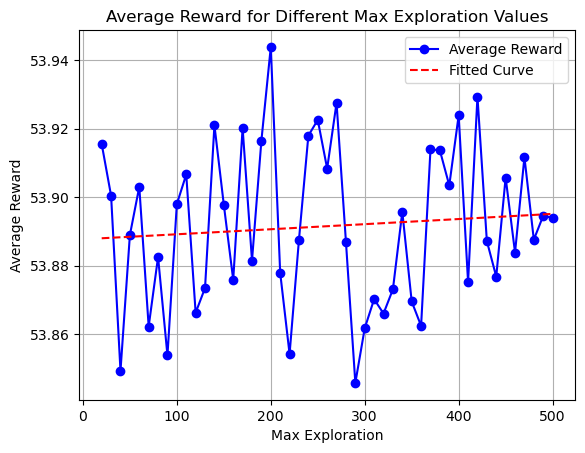

In [19]:
import numpy as np
import matplotlib.pyplot as plt

test_runs = 10000
test_rewards_optimal = np.zeros(test_runs)
N_short = 100
gamma_close_to_1 = 0.99

counter_alpha = [200, 1]
counter_beta = [1, 1]
counter_true_theta = np.array([0.85, 0.9])

avg_rewards_per_exploration = []

explore = [i for i in range(20, 501, 10)]

for max_exploration in explore:
    total_rewards = []

    for i in range(test_runs):
        local_alpha = counter_alpha.copy()
        local_beta = counter_beta.copy()
        test_rewards_optimal[i] = optimal_policy(N_short, gamma_close_to_1, counter_true_theta, local_alpha, local_beta, max_exploration)

    avg_r_optimal = np.mean(test_rewards_optimal)
    avg_rewards_per_exploration.append(avg_r_optimal)

plt.plot(explore, avg_rewards_per_exploration, marker='o', linestyle='-', color='b')
plt.xlabel('Max Exploration')
plt.ylabel('Average Reward')
plt.title('Average Reward for Different Max Exploration Values')
plt.grid(True)

# 数据拟合成一条曲线
z = np.polyfit(explore, avg_rewards_per_exploration, 2)
p = np.poly1d(z)

plt.plot(explore, p(explore), 'r--')
plt.legend(['Average Reward', 'Fitted Curve'])


plt.show()


It appears that increasing exploration leads to better results. Here’s our reasoning:  
We can interpret the equations in Problem 3 as Bellman equations in dynamic programming, except that they lack a base case. The base case actually exists when $\alpha, \beta \to \infty$. To approximate this base case, we use a sufficiently large number. Consequently, the larger the number, the closer it is to infinity, and the solution becomes more accurate.
